In [2]:
## For experimenting with regression

# For some reason, statmodels refuses to install "easily"
!pip install --upgrade pip
!pip install --upgrade statsmodels
import sys
print(sys.executable)
!{sys.executable} -m pip install statsmodels

/anaconda/envs/azureml_py310_sdkv2/bin/python


In [3]:
## Import libraries

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import mlflow
import matplotlib
import matplotlib.pyplot as plt
import joblib
%matplotlib inline

In [4]:
## Get data
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv

df = pd.read_csv('doggy-boot-harness.csv')
df.head()

--2025-01-17 08:09:19--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 838 [text/plain]
Saving to: ‘doggy-boot-harness.csv.3’

doggy-boot-harness. 100%[===================>]     838  --.-KB/s    in 0s      

2025-01-17 08:09:19 (18.4 MB/s) - ‘doggy-boot-harness.csv.3’ saved [838/838]



,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


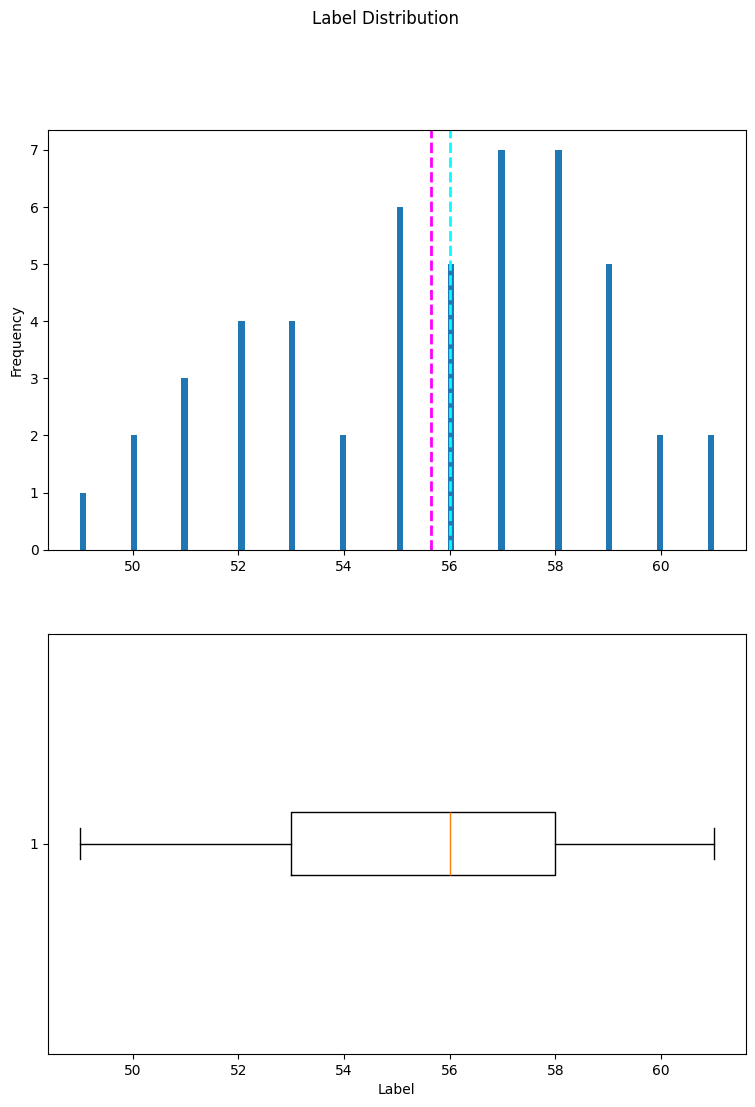

In [7]:
## Describe target
label = df['harness_size']
# print(label.value_counts())

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

# Add a title to the Figure
fig.suptitle('Label Distribution')

# Show the figure
fig.show()

In [8]:
## Train regression model
formula = "boot_size ~ harness_size"

model = smf.ols(formula = formula, data = df).fit()

In [9]:
# Print model parameters
model.params

Intercept       5.719110
harness_size    0.585925
dtype: float64

In [ ]:

plt.scatter(df["harness_size"], df["boot_size"])
plt.plot(df["harness_size"], model.params[1] * df["harness_size"] + model.params[0], 'r', label='Fitted line')

# add labels and legend
plt.xlabel("harness_size")
plt.ylabel("boot_size")
plt.legend()